## Backtest simulation for only investing in SPY ** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
    

In [175]:
# Backtesting Class
class BacktestingSystem:
    def __init__(self, initial_cash=1000):
        self.data = None
        self.initial_cash = initial_cash
    
    # Download data from yfinance
    def load_data(self, symbol, start_date, end_date):
        print(symbol)
        self.data = yf.download(symbol,start_date, end_date)[['Close']]
        self.data.columns = ['close']
    
    # Visualize Results
    def plot_results(self, portfolio):
        plt.style.use('seaborn-whitegrid')
    
        fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    
        # Plot stock price
        ax[0].plot(self.data['close'], label='Price', color='steelblue', linewidth=2)
        ax[0].set_ylabel('Price', fontsize=12)
        ax[0].legend(loc='upper left', fontsize=10)
    
        # Plot portfolio value
        ax[1].plot(portfolio['total'], label='Portfolio Value', color='forestgreen', linewidth=2)
        ax[1].set_ylabel('Portfolio Value', fontsize=12)
        ax[1].legend(loc='upper left', fontsize=10)
    
        # Set x-axis label for the last subplot
        ax[1].set_xlabel('Date', fontsize=12)
    
        # Adjust spacing between subplots
        plt.tight_layout(pad=2)
    
        # Set title and axis labels
        fig.suptitle('Backtesting Results', fontsize=16, fontweight='bold')
    
        # Customize tick parameters
        plt.tick_params(axis='both', which='both', bottom=False, left=False)
    
        # Remove spines
        for axis in ['top', 'right']:
            ax[0].spines[axis].set_visible(False)
            ax[1].spines[axis].set_visible(False)
    
        # Display the plot
        plt.show()

    def backtest_strategy(self, strategy):
        signals = strategy.generate_signals()
        positions = signals['signal']
        portfolio = pd.DataFrame(index=self.data.index)
        portfolio['position'] = positions
        portfolio['close'] = self.data['close']
        
        portfolio['Investment'] = 5

        # portfolio['total'] = (portfolio['position'] * portfolio['close']).cumsum()

        portfolio['total'] = (portfolio['position'] * portfolio['Investment']).cumsum()

        Total_money_invested = portfolio['total'].iloc[-1]

        portfolio_spy_avg = portfolio[portfolio['position']==1]['close'].mean()

        portfolio_total_shares = portfolio['total'].iloc[-1]/ portfolio[portfolio['position']==1]['close'].mean()


        # Calculate portfolio value

        print("\n")

        print('Total money invested: $', int(Total_money_invested  )  )

        print("\n")

        print('Total Portfolio value : $', int(portfolio_total_shares * portfolio['close'].iloc[-1] ) )

        print("\n")

        print('The average SPY price of the portfolio is: ', portfolio_spy_avg )

        print("\n")

        print('No. of shares: ', portfolio_total_shares  )

        print("\n")

        print('Profit till the date : $', (portfolio_total_shares * portfolio['close'].iloc[-1]) - Total_money_invested )

        print("\n")

        return portfolio

## TODO : Invet 5$ every day for 1 

- Wait 3 days for confirmation 

- Wait Condition that last Extreme greed price is greater than Extreme fear

- Super trend indicator? for bearish signal confirmation?


In [176]:
# Moving Average Crossover Strategy

class MovingAverageCrossoverStrategy:
    def __init__(self, data,fear_data):
        self.data = data
        self.fear_data = fear_data

    def fear_category(self,x):
        if x <= 25:
            return "Extreme fear"
        elif (x <= 50) and (x > 25):
            return "Fear"
        elif (x <= 75) and (x > 50):
            return "Greed"
        elif (x <= 100) and (x > 75):
            return "Extreme Greed"

    def generate_signals(self):

        Complete_df = pd.merge(self.fear_data, self.data, on='Date', how='inner')
        Complete_df.dropna(inplace=True)

        Complete_df['signal'] = Complete_df['Fear_index'].apply(lambda x: self.fear_category(x))
        
        # Generate trading signals

        Complete_df['signal'].replace(['Greed', 'Fear', 'Extreme fear', 'Extreme Greed'],[0,1,1,0], inplace=True)

        Complete_df.set_index('Date',inplace=True)

        return Complete_df

SPY
[*********************100%***********************]  1 of 1 completed


Total money invested: $ 1820


Total Portfolio value : $ 1837


The average SPY price of the portfolio is:  416.1588739248422


No. of shares:  4.373329788297846


Profit till the date : $ 17.585678415764733




C:\Users\vamsh\AppData\Local\Temp\ipykernel_15556\562369193.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


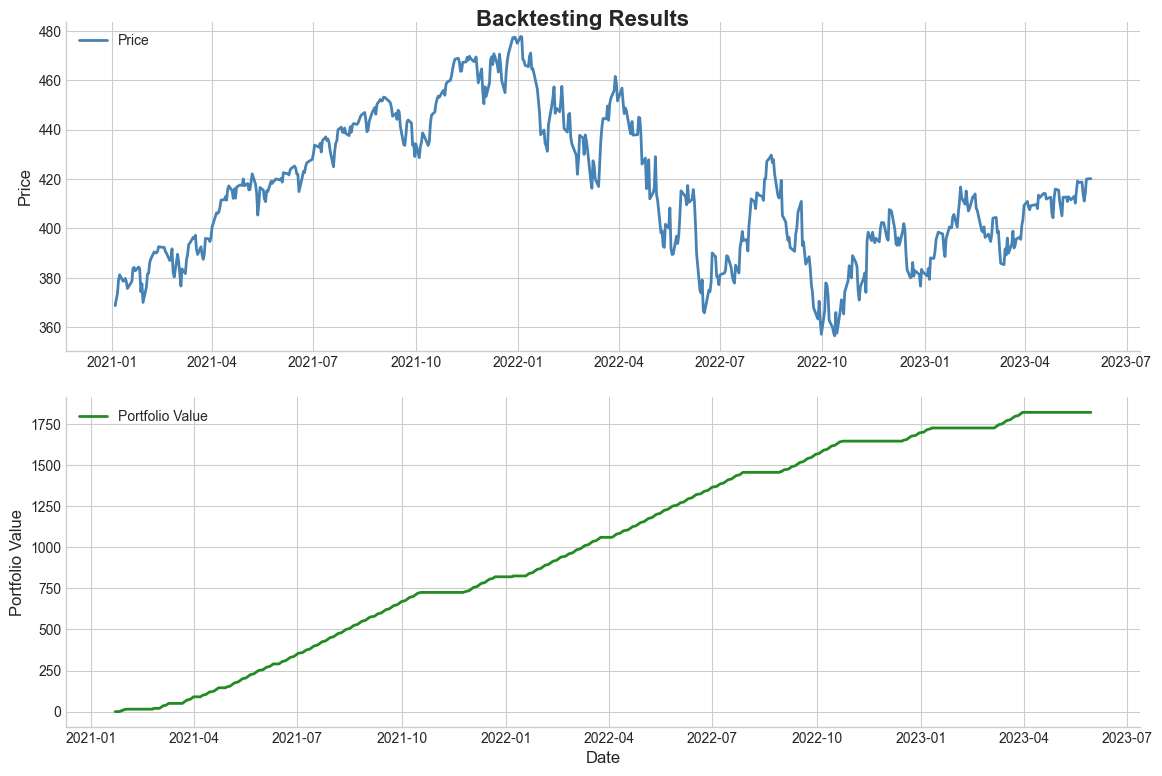

In [187]:
# Initiate Backtesting and Load Data
backtester = BacktestingSystem(initial_cash=100000000)
backtester.load_data('SPY', '2021-01-01', '2023-05-31')

# Inporting the fear and greed data
Fear_data = pd.read_csv(r'C:\Users\vamsh\OneDrive\Desktop\Trading_Bot_version_1\Data\complete_data_fearindex.csv',index_col=0)
Fear_data.columns = ['Date','Fear_index']
Fear_data['Date'] = pd.to_datetime(Fear_data['Date'])     

# Usage Example for Moving Average strategy
moving_average_strategy = MovingAverageCrossoverStrategy(backtester.data,Fear_data)
moving_average_portfolio = backtester.backtest_strategy(moving_average_strategy)
backtester.plot_results(moving_average_portfolio)